# Bank Loan Portfolio Analysis

Author  : Namora Fernando <br>
Date    : December 15th, 2025 <br>

This notebook performs an initial data understanding to support further analysis of retail loan portfolio performance. This analysis represents internal (MIS) reporting credit portfolio from retail bank to monitor performance, risk, and profile of customers.

Key Objectives:
- Analyze overall credit portfolio performance (approved vs rejected loans)
- Identify key risk indicators related to loan outcomes
- Provide data-driven insights to support management decisions

Source of Data: <br>
https://www.kaggle.com/datasets/zaurbegiev/my-dataset?resource=download&select=credit_train.csv

## Data Loading and Initial Inspection

Inspect the data by take a sneak peak a few lines after import data process and see data information.

In [1]:
# import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define dataframe of datasets
df = pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Understanding the Dataset

Each row represents a single retail loan application. <br>
The dataset contains borrower information, loan characteristics, credit history, and final loan status

### Data Categories

We can split the data by categories as follows:

**A. Loan identifiers:** 
- `Loan ID`, 
- `Customer ID`

**B. Loan characteristics :**
- `Current Loan Amount`, 
- `Term`, 
- `Purpose`

**C. Customer financial profile :**
- `Annual Income`, 
- `Years in current job`, 
- `Home Ownership`, 
- `Number of Open Accounts`, 
- `Monthly Debt`

**D. Credit history :**
- `Credit Score`, 
- `Years of Credit History`, 
- `Months since last delinquent`, 
- `Number of Credit Problems`, 
- `Current Credit Balance`, 
- `Maximum Open Credit`, 
- `Bankruptcies`, 
- `Tax Liens`

**E. Loan outcome :**
- `Loan Status`

---

People may ask, what is the most important aspect to analyze from this dataset?

From the data structure, it can be seen that most variables refer to a single final column, `Loan Status`, which represents the outcome of each retail loan application.

Based on this perspective, several analytical questions arise:
- What is the overall distribution of loan outcomes based on `Loan Status`?
- For each `Loan Status` value, how does the borrower profile differ, particularly across income levels?
- Which factors (columns) appear to have the strongest relationship with the loan outcome?
- How does loan `Purpose` relate to loan outcomes, and which purposes tend to be more frequently approved?
- What characteristics may represent higher credit risk when a customer applies for a loan?

These questions can be addressed by conducting further analysis on selected variables.  
Therefore, the next step focuses on preparing and cleaning the dataset before moving into deeper analysis.

### Data Quality Check

In [2]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(df.info())

Number of rows: 100514
Number of columns: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12 

In [3]:
# check unique values for categorical columns

# number of unique values of `Loan ID`
print(f"Number of unique values of 'Loan ID': {df['Loan ID'].nunique()}")
print()

# number of unique values of `Customer ID`
print(f"Number of unique values of 'Customer ID': {df['Customer ID'].nunique()}")
print()

# unique values of `Loan Status`
print("Unique values of 'Loan Status':")
print(df['Loan Status'].unique())
print()

# unique values of `Term`
print("Unique values of 'Term':")
print(df['Term'].unique())
print()

# unique values of `Years in current job`
print("Unique values of 'Years in current job':")
print(df['Years in current job'].unique())
print()

# unique values of `Home Ownership`
print("Unique values of 'Home Ownership':")
print(df['Home Ownership'].unique())
print()

# unique values of `Purpose`
print("Unique values of 'Purpose':")
print(df['Purpose'].unique())
print()

Number of unique values of 'Loan ID': 81999

Number of unique values of 'Customer ID': 81999

Unique values of 'Loan Status':
['Fully Paid' 'Charged Off' nan]

Unique values of 'Term':
['Short Term' 'Long Term' nan]

Unique values of 'Years in current job':
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']

Unique values of 'Home Ownership':
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]

Unique values of 'Purpose':
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy' nan]



> **Data Quality Awareness:** <br>

> Several data quality issues were identified during initial inspection:
> - Notice that number of unique values of ID is not the same with total rows of the data.
> - Missing values are present in important variables such as `Loan Status`.
> - Inconsistent category labels are found in categorical variables (e.g. `Other` vs `other`).

In [4]:
# check for loans more than maximum credit limit
df[df['Maximum Open Credit'] < df['Current Loan Amount']]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
13,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,Fully Paid,99999999.0,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,NaN,10.0,1.0,225549.0,496474.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266.0,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5.0,1.0,132012.0,242660.0,1.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


> Suggest to see more about column `Current Loan Amount` after see the loan with amount more than 90 millions

In [5]:
# check for loans greater than 1 million
print(df[df['Current Loan Amount'] > 1e6]['Current Loan Amount'].unique())

# check how many such rows exist
row_high_loan = df[df['Current Loan Amount'] > 1e6]['Current Loan Amount'].shape[0]
print(f"Number of rows with loans greater than 1 million: {row_high_loan}")

[99999999.]
Number of rows with loans greater than 1 million: 11484


> We can see about 11k rows of 100k rows have value of `Current Loan Amount` more than 99 million.

> **Data Quality Notes**

> - Important variables, including the loan outcome (`Loan Status`), contain missing values. These will require further handling during the data cleaning process.
> - Inconsistent category labels are observed in categorical variables, such as `Other` vs `other`.
> - The number of unique values in the identifier column `Loan ID` (81,999) does not match the total number of rows, indicating possible duplicate loan records.
> - Approximately 11% of records contain an unusually large value (99999999) in the `Current Loan Amount` column. This value is suspected to be a placeholder for missing or invalid loan amount information and has been converted to NaN. These records are retained and included in the analysis using other available attributes.

---

## Data Cleaning and Preparation

In this section, the dataset is prepared by addressing the data quality issues identified during the initial inspection. <br>
Based on the findings from the previous step, the following cleaning actions are performed:

- Review potential duplicate records based on the number of unique values in the identifier column (column `Loan ID` and `Customer ID`)
- Inspect and handle missing values of important variables such as `Loan Status`
- Address inconsistent category labels in categorical variables, particularly `Purpose` (`Other` vs `other`)
- Treat unusually large values (99999999) in `Current Loan Amount` as missing data

### Data Cleaning Process

The data cleaning process is carried out as follows:

1. Handle missing values of important variables such as `Loan Status` especially since this column represents the final output of a single loan application that we want to analyze.

2. Fix unusually large values of `Current Loan Amount` to be treated as missing data.

3. Address inconsistent category labels, particularly `Purpose` column.

4. Analyzes potential duplicate records based on identifier column (`Loan ID` and `Customer ID`).

#### 1. Handle missing values of `Loan Status`

In [6]:
# 1. inspect nan values for `Loan Status` the most important column we want to observe
df[df['Loan Status'].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df[df['Loan Status'].isna()].isna().sum().sum())
print(514 * 19)

9766
9766


Hence, all other values are NaN when `Loan Status` is NaN. We will delete these rows.

In [8]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['Loan Status'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null   flo

#### 2. Fix unusually large values of `Current Loan Amount`

In [9]:
# 2. reinspect `Current Loan Amount` high values after dropping `Loan Status` nan rows

# check for loans greater than 1 million
print(df_clean[df_clean['Current Loan Amount'] > 1e6]['Current Loan Amount'].unique())

# check how many such rows exist
row_high_loan = df_clean[df_clean['Current Loan Amount'] > 1e6]['Current Loan Amount'].shape[0]
print(f"Number of rows with loans greater than 1 million: {row_high_loan}")

[99999999.]
Number of rows with loans greater than 1 million: 11484


Since number of rows still the same as previous inspection, we need to treat as planned previously. <br>
The reason for this treatment is since high values (almost infinite) inpute of `Current Loan Amount` suspect to be how the bank treat the missing values of `Loan Amount` data upon input process.

Rather than removing these records immediately, the unusually large values are treated as missing data. <br>
A decision to exclude records with missing loan amount will be made at the analysis stage, where loan amount is required for interpretation.

In [10]:
# replace 99999999 with nan in `Current Loan Amount` column
df_clean['Current Loan Amount'] = df_clean['Current Loan Amount'].replace(99999999, np.nan)

#### 3. Inconsistent category labels on variables `Purpose`

In [11]:
print("Unique values of 'Purpose' after cleaning:")
print(df_clean['Purpose'].unique())

Unique values of 'Purpose' after cleaning:
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


From unique values of column `Purpose`, it can be infers that there is duplicate values `Other` vs `other`, one will be replace with the other so will not be differentiate as different values.

In [12]:
# replace all records of 'other' with 'Other' in `Purpose` column
df_clean['Purpose'] = df_clean['Purpose'].replace('other', 'Other')
print("Replaced 'other' with 'Other' in 'Purpose' column has been done.")

Replaced 'other' with 'Other' in 'Purpose' column has been done.


#### 4. Potential duplicate records based on column (`Loan ID` and `Customer ID`)

In [13]:
# next is analyze potential duplicate values based on identifier columns `Loan ID` and `Customer ID`

# number of unique values of `Loan ID` and `Customer ID`
n_unique_loan_id = df_clean['Loan ID'].nunique()
n_unique_customer_id = df_clean['Customer ID'].nunique()

print(f"Number of unique values of 'Loan ID': {n_unique_loan_id}")
print(f"Number of unique values of 'Customer ID': {n_unique_customer_id}")
print()
print("The rest of the rows might be duplicates are as follows: ")
print("Number of total rows - number of unique `Loan ID`:", df_clean.shape[0] - n_unique_loan_id)

Number of unique values of 'Loan ID': 81999
Number of unique values of 'Customer ID': 81999

The rest of the rows might be duplicates are as follows: 
Number of total rows - number of unique `Loan ID`: 18001


Initial inspection shows that the number of unique `Loan ID` values is lower than the total number of rows, indicating the presence of duplicate loan records.

In [14]:
print(df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()

10215


After removing fully identical rows using all columns, a subset of records with the same `Loan ID` still remains.

In [15]:
dup_loan_ids = df_clean['Loan ID'].value_counts()
dup_loan_ids = dup_loan_ids[dup_loan_ids > 1].index
dup_loan_rows = df_clean[df_clean['Loan ID'].isin(dup_loan_ids)]

dup_loan_rows = dup_loan_rows[~dup_loan_rows.duplicated()]

sample_loan = dup_loan_rows['Loan ID'].iloc[10]
dup_loan_rows[dup_loan_rows['Loan ID'] == sample_loan]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
71,67d1e3af-f5f1-41a0-8051-ebe452c3502b,e978f6d8-912e-418e-8649-1b970583f4c8,Fully Paid,162360.0,Short Term,720.0,486875.0,10+ years,Rent,Debt Consolidation,8560.83,15.1,46.0,16.0,0.0,129504.0,434654.0,0.0,0.0
8370,67d1e3af-f5f1-41a0-8051-ebe452c3502b,e978f6d8-912e-418e-8649-1b970583f4c8,Fully Paid,162360.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,8560.83,15.1,46.0,16.0,0.0,129504.0,434654.0,0.0,0.0


Further inspection indicates that these remaining duplicates primarily differ due to missing values in key financial variables rather than representing distinct loan applications.

Since `Credit Score`, `Annual Income`, and `Current Loan Amount` are essential for borrower risk analysis, records with missing values in these variables are excluded from further analysis to ensure consistency and interpretability of results.

In [16]:
df_analysis = df_clean.dropna(subset=['Credit Score', 'Annual Income', 'Current Loan Amount']).copy()

After applying data quality filters, approximately 40% of records are excluded due to missing values in key financial variables. <br>
While this significantly reduces the dataset size, the remaining observations contain complete borrower risk information and provide a more reliable basis for analysis. <br>
This cleaned subset is used for all subsequent exploratory analysis and visualization.

---

#### Additional Data Quality Adjustment Identified During EDA

During exploratory analysis, it was observed that a subset of records contains unusually high Credit Score values far exceeding standard industry ranges.

Further inspection shows that 4,551 records share these extreme values, indicating a data quality issue rather than natural variation.

Since Credit Score is a key indicator in borrower risk assessment, these records are excluded from subsequent analysis to ensure interpretability and alignment with real-world credit scoring practices.

In [17]:
# remove implausible credit score values identified during EDA
df_analysis = df_analysis[df_analysis['Credit Score'] <= 1000]

In [18]:
# current data after cleaning
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54596 entries, 0 to 99998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       54596 non-null  object 
 1   Customer ID                   54596 non-null  object 
 2   Loan Status                   54596 non-null  object 
 3   Current Loan Amount           54596 non-null  float64
 4   Term                          54596 non-null  object 
 5   Credit Score                  54596 non-null  float64
 6   Annual Income                 54596 non-null  float64
 7   Years in current job          52278 non-null  object 
 8   Home Ownership                54596 non-null  object 
 9   Purpose                       54596 non-null  object 
 10  Monthly Debt                  54596 non-null  float64
 11  Years of Credit History       54596 non-null  float64
 12  Months since last delinquent  25551 non-null  float64
 13  Number

---

## Exploratory Data Analysis (EDA)

In this section simple EDA will be shown to basic knowledge to grasp the answer of our questions that arises upon first inspection of the data:

1. What is the overall distribution of loan outcomes based on `Loan Status`?
2. For each `Loan Status` value, how does the borrower profile differ, particularly across income levels?
3. Which factors (columns) appear to have the strongest relationship with the loan outcome?
4. How does loan `Purpose` relate to loan outcomes, and which purposes tend to be more frequently approved?
5. What characteristics may represent higher credit risk when a customer applies for a loan?

### 1. Distribution of loan outcomes `Loan Status`

In [19]:
loan_status_counts = df_analysis['Loan Status'].value_counts()

print("Percentage of 'Fully Paid' and 'Charged Off':")
print(f"Fully Paid: {loan_status_counts['Fully Paid']/df_analysis.shape[0] * 100:.2f}%")
print(f"Charged Off: {loan_status_counts['Charged Off']/df_analysis.shape[0]* 100:.2f}%")

Percentage of 'Fully Paid' and 'Charged Off':
Fully Paid: 76.81%
Charged Off: 23.19%


In general, we can observe that 76.81% of loan applications are categorized as **Fully Paid**, indicating that most borrowers were able to complete their loan obligations without issues.

Meanwhile, 23.19% of the records (approximately 12,660 loan applications) are classified as **Charged Off**. <br>
This proportion suggests that credit risk is not negligible, and management may need to apply more cautious screening criteria to reduce potential losses from future loan applications.

### 2. Borrower profile differ across income levels for each `Loan Status`

In this analysis, borrower profile is viewed as a combination of current financial condition and historical credit behavior. Columns that we will inspects:

A. `Annual Income` <br>
B. `Credit Score` <br>
C. `Monthly Debt`

#### 2A. `Annual Income`

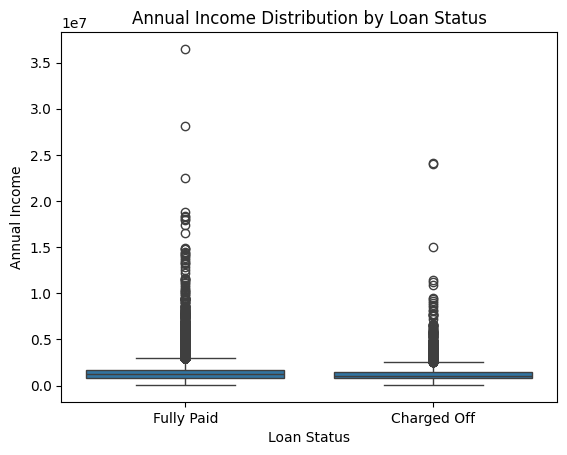

In [20]:
sns.boxplot(
    data = df_analysis,
    x = 'Loan Status',
    y = 'Annual Income'
)

plt.title('Annual Income Distribution by Loan Status')
plt.show()

Although annual income exhibits a highly right-skewed distribution with extreme outliers, the median income of borrowers with **Charged Off** status appears slightly slower than those who are **Fully Paid**. 

This suggests that income level alone may not be a sufficient indicator of loan outcome. However, lower income levels are associated with a higher likelihood of charge-off.

To improve interpretability, a log transformation is applied in the following analysis.

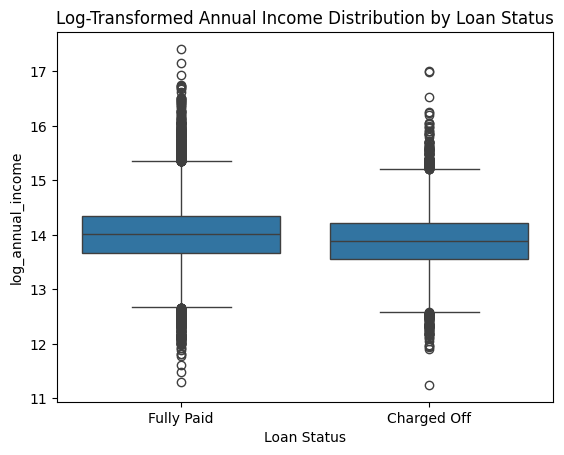

In [21]:
df_analysis['log_annual_income'] = np.log1p(df_analysis['Annual Income'])

sns.boxplot(
    data = df_analysis,
    x = 'Loan Status',
    y = 'log_annual_income'
)

plt.title('Log-Transformed Annual Income Distribution by Loan Status')
plt.show()

After applying a log transformation to annual income, the income distribution becomes more interpretable. <br>
Borrowers with **Fully Paid** status tend to have higher income levels compared to those **Charged Off**, although there remains substantial overlap between the two groups. <br>
This indicates that while income contributes to loan outcomes, it should be evaluated alongside credit history and debt-related variables.

#### 2B. `Credit Score`

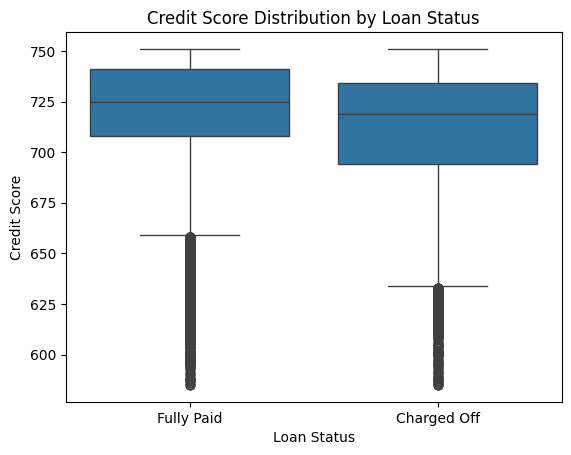

In [22]:
sns.boxplot(
    data = df_analysis,
    x = 'Loan Status',
    y = 'Credit Score'
)

plt.title('Credit Score Distribution by Loan Status')
plt.show()

As expected, borrowers with loan outcomes classified as **Fully Paid** tend to have higher **Credit Score** values compared to those whose loans are **Charged Off**.

The distribution indicates that lower credit scores are associated with a higher likelihood of loan charge-off. This suggests that **Credit Score** is a strong risk indicator and plays an important role in assessing borrower creditworthiness.

From a risk management perspective, applicants with lower credit scores may require stricter evaluation or additional safeguards to mitigate potential losses.

#### 2C. `Monthly Debt`

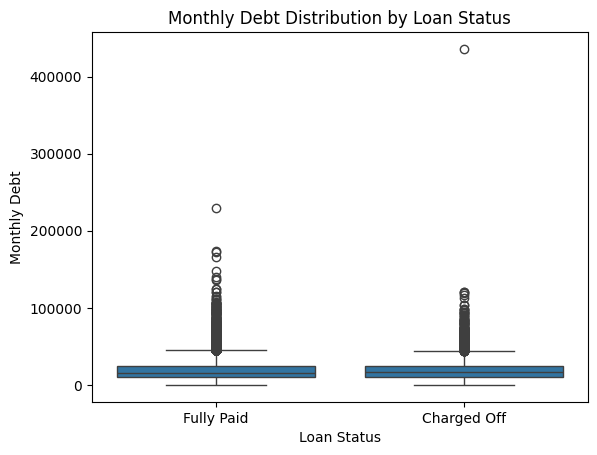

In [23]:
sns.boxplot(
    data = df_analysis,
    x = 'Loan Status',
    y = 'Monthly Debt'
)

plt.title('Monthly Debt Distribution by Loan Status')
plt.show()

Same as annual income, since terms with money as well, monthly debt exhibits a highly right-skewed distribution with the presence of extreme outliers. Borrowers with **Charged Off** status show a slightly higher median monthly debt compared to those who are **Fully Paid**.

To improve interpretability, a log transformation is applied in the following analysis.

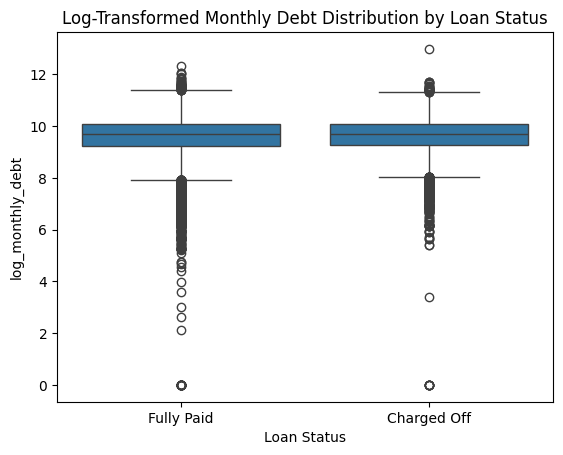

In [24]:
df_analysis['log_monthly_debt'] = np.log1p(df_analysis['Monthly Debt'])

sns.boxplot(
    data = df_analysis,
    x = 'Loan Status',
    y = 'log_monthly_debt'
)

plt.title('Log-Transformed Monthly Debt Distribution by Loan Status')
plt.show()

However, after applying a log transformation, the distributions of monthly debt across loan outcomes still exhibit substantial overlap. This indicates that **monthly debt alone is not a strong differentiating factor**, but it may contribute to higher credit risk when evaluated alongside income level and credit history.

Overall, higher monthly debt is associated with an increased likelihood of charge-off, particularly when combined with lower income or weaker credit profiles.

### 3. Strongest relationship with `Loan Status`

In this section, we focus on identifying variables that exhibit the strongest relationship with loan outcomes. 
The selected variables represent key dimensions commonly used in retail credit risk assessment:

- **Credit Score**: a direct summary of borrower creditworthiness  
- **Annual Income**: an indicator of repayment capacity  
- **Monthly Debt**: a proxy for ongoing financial obligations  
- **Number of Credit Problems**: historical credit risk signals such as delinquencies or defaults  

These variables are analyzed comparatively to assess how borrower risk profiles differ between Fully Paid and Charged Off loans.

In [25]:
# feature engineering for `Number of Credit Problems`
# cross tab to percentage grouped by `Loan Status`
df_analysis['has_credit_problem'] = (df_analysis['Number of Credit Problems'] > 0)

credit_problem_rate = (pd.crosstab(
    df_analysis['has_credit_problem'],
    df_analysis['Loan Status'],
    normalize='index'
    ).reset_index())

credit_problem_rate

Loan Status,has_credit_problem,Charged Off,Fully Paid
0,False,0.231621,0.768379
1,True,0.233409,0.766591


Unlike continuous financial variables, the **Number of Credit Problems** is highly discrete and **zero-inflated**. <br>
As a result, a proportional comparison is more appropriate than distribution-based visualizations. The bar chart illustrates the relative charge-off rate for borrowers with and without prior credit problems.

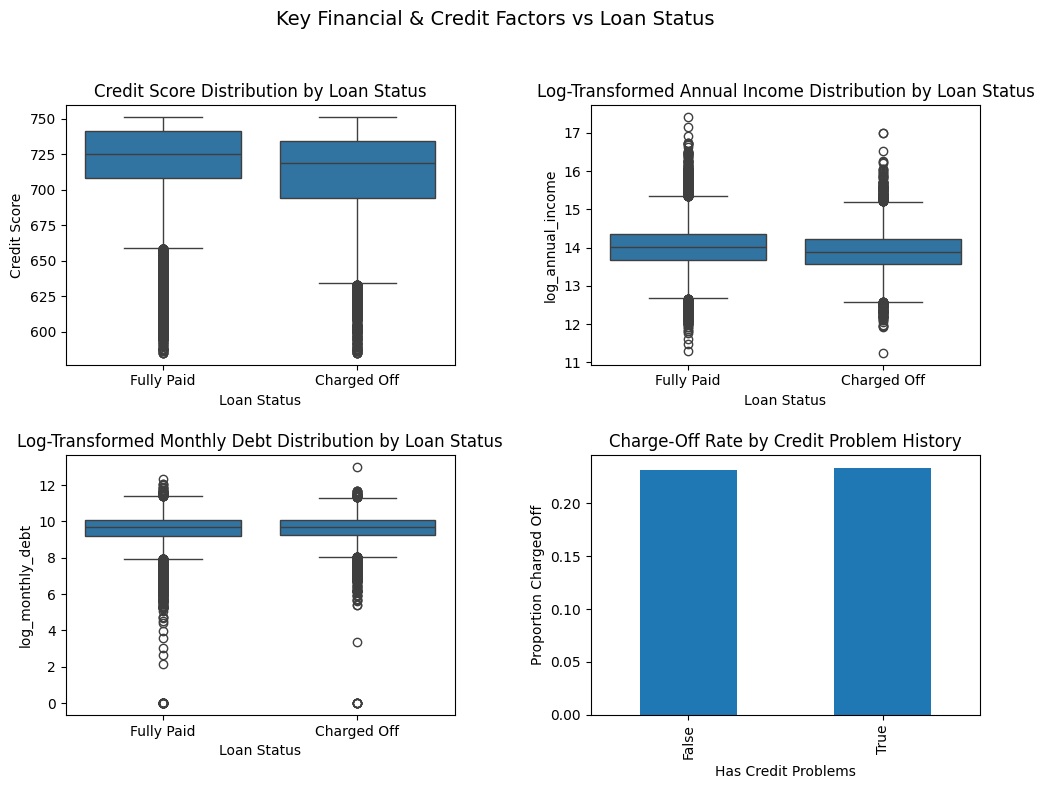

In [26]:
# 2x2 grid of subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))

# first subplot 'Credit Score'
sns.boxplot(data = df_analysis, x = 'Loan Status', y = 'Credit Score', ax = axes[0, 0])
axes[0, 0].set_title('Credit Score Distribution by Loan Status')

# second subplot 'Annual Income' log-transformed
sns.boxplot(data = df_analysis, x = 'Loan Status', y = 'log_annual_income', ax = axes[0, 1])
axes[0, 1].set_title('Log-Transformed Annual Income Distribution by Loan Status')

# third subplot 'Monthly Debt' log-transformed
sns.boxplot(data = df_analysis, x = 'Loan Status', y = 'log_monthly_debt', ax = axes[1, 0])
axes[1, 0].set_title('Log-Transformed Monthly Debt Distribution by Loan Status')

# fourth barplot 'Numbers of Credit Problems' proportion-based
credit_problem_rate.plot(kind='bar', x='has_credit_problem', y='Charged Off', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Charge-Off Rate by Credit Problem History')
axes[1, 1].set_xlabel('Has Credit Problems')
axes[1, 1].set_ylabel('Proportion Charged Off')

# main title for the entire figure
fig.suptitle('Key Financial & Credit Factors vs Loan Status', fontsize=14, y=0.98)

# adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.show()

Among the variables analyzed, **Credit Score** exhibits the clearest separation between **Fully Paid** and **Charged Off** loans, indicating its strong predictive relevance.

**Annual Income** and **Monthly Debt** show noticeable but overlapping distributions, suggesting that while financial capacity matters, these variables alone are insufficient to fully distinguish loan outcomes.

Borrowers with prior credit problems exhibits a slightly higher charge-off rate compared to those without prior issues. While the difference is not extreme, this suggests that historical **Number of Credit Problems** act as a meaningful risk signal, particularly when evaluated alongside other financial and credit indicators.

Overall, loan outcomes appear to be driven by a combination of creditworthiness, repayment capacity, and past credit issues rather than any single factor in isolation.

### 4. `Purpose` vs `Loan Status`

In [27]:
# feature engineering for `Purpose`
# cross tab to percentage grouped by `Loan Status`
purpose_loan_status = pd.crosstab(
    df_analysis['Purpose'],
    df_analysis['Loan Status'],
    normalize='index'
).sort_values(by='Charged Off', ascending=False)

purpose_loan_status

Loan Status,Charged Off,Fully Paid
Purpose,,
small_business,0.440252,0.559748
moving,0.320988,0.679012
Business Loan,0.313225,0.686775
vacation,0.265306,0.734694
Medical Bills,0.261460,0.738540
wedding,0.245614,0.754386
Other,0.233817,0.766183
Debt Consolidation,0.231698,0.768302
major_purchase,0.228426,0.771574


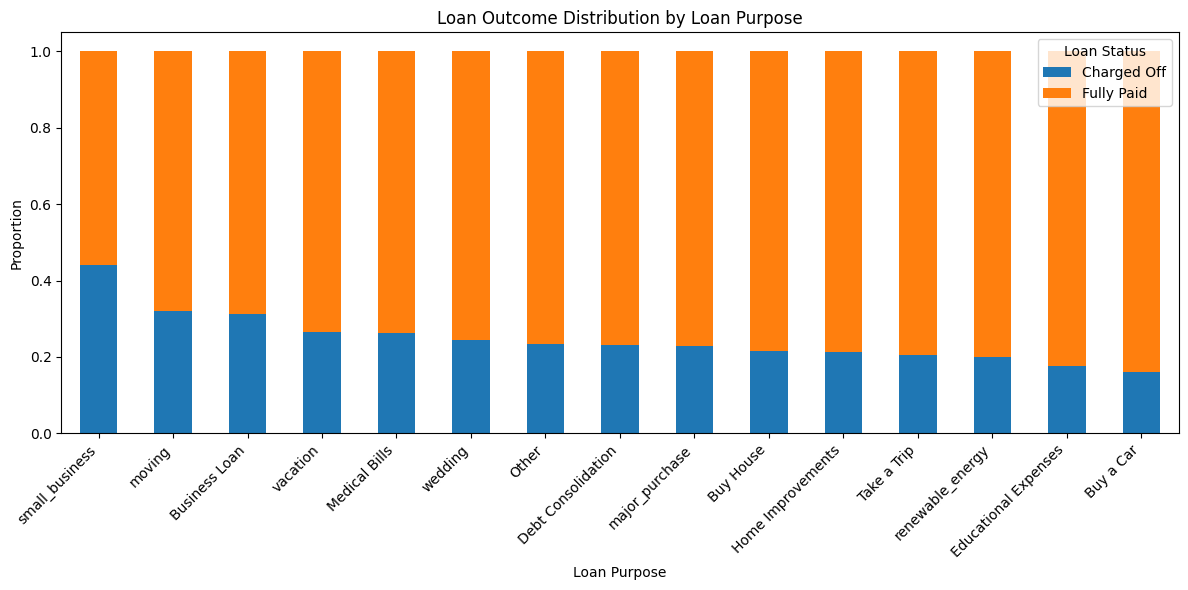

In [28]:
# visualize with bar plot
purpose_loan_status[['Charged Off', 'Fully Paid']].plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True
)

plt.title('Loan Outcome Distribution by Loan Purpose')
plt.ylabel('Proportion')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Loan purpose exhibits a clear relationship with loan outcomes.

Loans associated with **small business**, **moving**, and **business-related purposes** show the highest charge-off proportions, indicating elevated risk. These purposes are often linked to income volatility or transitional financial conditions.

In contrast, purposes such as **car purchases**, **educational expenses**, and **home improvements** demonstrate higher full-payment rates, suggesting more stable repayment behavior.

Overall, this highlights that loan purpose captures important behavioral and financial context, making it a meaningful factor in assessing borrower risk.

### 5. High Credit Risk Characteristics

Based on the exploratory analysis, several borrower characteristics are consistently associated with higher credit risk.

Loans that result in **Charged Off** outcomes tend to be associated with **lower credit scores**, **lower income levels**, and **higher monthly debt burdens**. In addition, borrowers with a **history of credit problems** exhibit higher charge-off rates compared to those without prior issues.

Loan purpose further differentiates risk profiles, where purposes such as **small business** and **moving** display substantially higher charge-off proportions.

Overall, credit risk appears to be driven by a combination of borrower financial capacity, credit history, and loan intent, rather than a single factor in isolation.

## Data Export for Reporting & Visualization

The cleaned and filtered dataset resulting from the exploratory data analysis is exported for downstream reporting and visualization. This final dataset contains complete borrower risk information and will be used in the next visualization step with Tableau.

In [29]:
# export cleaned dataset for dashboarding
df_analysis.to_csv('bank_loan_portfolio_cleaned.csv', index=False)

print("Cleaned dataset exported successfully.")

Cleaned dataset exported successfully.
